# Preprocesamiento de Texto: Libro, "Don Quijote de la mancha"

# 1. Carga de dataset y procesamiento con NLTK:

***Se realizará el preprocesamiento de datos para un libro en PDF en línea, "Don quijote de la mancha"***

**Carga de dataset:**
* Se usará requests.get(url) para descargar el archivo PDF desde el enlace proporcionado.
* Guardar el archivo PDF localmente con with open("quijote.pdf", "wb") as file.
* Usar pdfplumber para leer el PDF, luego extraemos el texto de cada página con page.extract_text().

**Procesamiento con NLTK**:

* Realizar la tokenización del texto extraído usando word_tokenize(text.lower()).
* Remover las stopwords en inglés usando stopwords.words('english').
* Lematizar las palabras con WordNetLemmatizer() para reducirlas a su forma base.
* Etiquetar las palabras con el etiquetado gramatical POS usando nltk.pos_tag(lemmas).

En resumen, el código siguiente se usará para extraer el texto del archivo PDF, procesarlo con NLTK (tokenización, remoción de stopwords, lematización) y luego etiquetar las palabras con sus correspondientes partes del discurso (POS tagging).

In [ ]:
!pip install pdfplumber
import requests
import pdfplumber
import nltk
import os
import shutil

# Descargar el archivo PDF
url = "https://www.imprentanacional.go.cr/editorialdigital/libros/literatura%20universal/quijote_edincr.pdf"
response = requests.get(url)

# Guardar el archivo PDF localmente
with open("quijote.pdf", "wb") as file:
    file.write(response.content)

# Usar pdfplumber para leer el PDF y extraer el texto
with pdfplumber.open("quijote.pdf") as pdf:
    text = ""
    for page in pdf.pages:
        page_text = page.extract_text()
        if page_text:
            text += page_text
        else:
            print("Advertencia: no se extrajo texto de una página.")

# Verificar si el texto se extrajo correctamente
if len(text) > 0:
    print("Texto extraído con éxito.")
else:
    print("No se pudo extraer texto del PDF.")

# Descargar los recursos necesarios de NLTK
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('universal_tagset')

# Comprobación de que los recursos se descarguen correctamente
try:
    from nltk.tokenize import word_tokenize
    text_sample = "Este es un ejemplo para verificar si punkt funciona."
    tokens = word_tokenize(text_sample.lower())
    print("Tokens de ejemplo:", tokens)
except Exception as e:
    print(f"Error al tokenizar: {e}")

# Tokenización: Comprobación de que la función word_tokenize cargue el recurso correcto
try:
    tokens = word_tokenize(text.lower())  # Convertir a minúsculas y tokenizar
    print("Tokens:", tokens[:100])  # Ver los primeros 100 tokens
except LookupError as le:
    print("Error de búsqueda de recursos:", le)
except Exception as e:
    print(f"Error al tokenizar el texto extraído: {e}")

# Remoción de Stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
print("Filtered Tokens:", filtered_tokens[:100])  # Ver los primeros 100 tokens filtrados

# Lematización
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lemmas = [lemmatizer.lemmatize(word) for word in filtered_tokens]
print("Lemmas:", lemmas[:100])  # Ver los primeros 100 lemas

# Etiquetado POS de los lemas
try:
    pos_tags = nltk.pos_tag(lemmas)
    print("POS Tags:", pos_tags[:100])  # Imprimir las primeras 100 etiquetas
except Exception as e:
    print(f"Error al etiquetar POS: {e}")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 19.4 MB/s eta 0:00:00
Advertencia: no se extrajo texto de una página.
Advertencia: no se extrajo texto de una página.
Advertencia: no se extrajo texto de una página.
Advertencia: no se extrajo texto de una página.
Texto extraído con éxito.


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


Tokens de ejemplo: ['este', 'es', 'un', 'ejemplo', 'para', 'verificar', 'si', 'punkt', 'funciona', '.']
Tokens: ['863.32', 'c419i', 'cervantes', 'saavedra', ',', 'miguel', 'de', ',', '1547-1616', 'el', 'ingenioso', 'hidalgo', 'don', 'quijote', 'de', 'la', 'mancha', '.', '--', '1a', 'ed', '.', '–', 'san', 'josé', ':', 'imprenta', 'nacional', ',', '2012', '.', '1', 'recurso', 'en', 'línea', '(', '842', 'p.', ')', ':', 'pdf', '.', ';', '3555', 'kb', '.', 'isbn', '978-9977-58-319-8', '1.', 'novela', 'española', '.', 'i.', 'título', '.', 'dgb/pt', '12-35', 'esta', 'obra', 'está', 'bajo', 'una', 'licencia', 'de', 'creative', 'commons', 'reconocimiento-', 'nocomercial-sinobraderivada', '3.0', 'costa', 'rica', '.', 'http', ':', '//creativecommons.org/licenses/by-nc-nd/3.0/cr/', 'el', 'diseño', 'y', 'diagramación', 'de', 'este', 'libro', 'se', 'comparte', 'con', 'una', 'licencia', 'creative', 'commons', 'para', 'compartir', ',', 'copiar', ',', 'distribuir', ',', 'ejecutar', 'y', 'comunicar', 'p

# 2. Análisis Gráficos

##2.1	Nube de Palabras (Word Cloud):


### Sin excluir texto

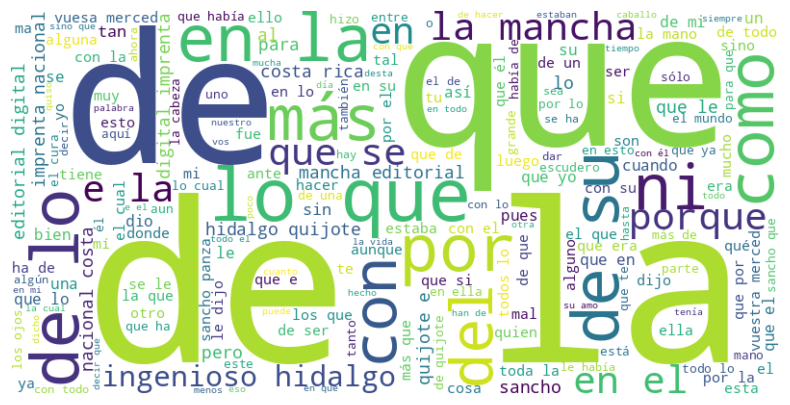

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

# Nube de palabras para las palabras lematizadas
# Convertir las lemas en una sola cadena de texto
lemmas_text = " ".join(lemmas)

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(lemmas_text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # No mostrar ejes
plt.show()

### Excluyendo palabras irrelevantes

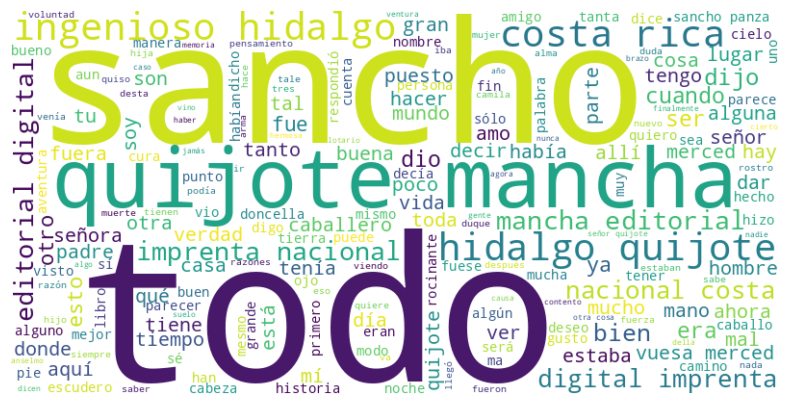

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Listas de palabras irrelevantes (ya las tienes definidas en tu código)
preposiciones_es = {
    "a", "ante", "bajo", "cabe", "con", "contra", "de", "desde", "durante", "en",
    "entre", "hacia", "hasta", "mediante", "para", "por", "según", "sin", "so",
    "sobre", "tras", "versus", "vía"
}

articulos = {"el", "la", "los", "las", "un", "una", "unos", "unas"}

pronombres = {
    "yo", "tú", "vos", "usted", "él", "ella", "nosotros", "nosotras",
    "vosotros", "vosotras", "ustedes", "ellos", "ellas", "me", "te", "se",
    "nos", "os", "lo", "la", "le", "les", "los", "las", "mío", "mía", "míos",
    "mías", "tuyo", "tuya", "tuyos", "tuyas", "suyo", "suya", "suyos", "suyas",
    "nuestro", "nuestra", "nuestros", "nuestras", "vuestro", "vuestra",
    "vuestros", "vuestras", "cuyo", "cuya", "cuyos", "cuyas", "este", "esta",
    "estos", "estas", "ese", "esa", "esos", "esas", "aquel", "aquella",
    "aquellos", "aquellas", "quien", "quienes", "cual", "cuales", "que",
    "cuanto", "cuanta", "cuantos", "cuantas"
}

conectores = {
    "y", "e", "o", "u", "ni", "pero", "aunque", "sin embargo", "por lo tanto",
    "pues", "entonces", "además", "así", "asimismo", "también", "no obstante",
    "sino", "es decir", "en cambio", "mientras", "puesto que", "ya que",
    "debido a", "porque", "por qué", "con el fin de", "de modo que", "dado que",
    "de manera que", "luego", "por consiguiente", "al contrario", "en efecto",
    "por otro lado", "por una parte", "por otra parte"
}

# Otras palabras a excluir
palabras_excluir_adicionales = {
    "su", "del", "como", "mi", "más", "menos", "si", "al", "tan", "ha", "sus", "segun"
}

# Unir todas las listas de palabras irrelevantes
palabras_irrelevantes = preposiciones_es.union(articulos, pronombres, conectores, palabras_excluir_adicionales)

# Filtrar las lemas (o tokens) para eliminar las palabras irrelevantes
lemmas_filtrados = [lemma for lemma in lemmas if lemma not in palabras_irrelevantes]

# Convertir las lemas filtradas en una sola cadena de texto
lemmas_text = " ".join(lemmas_filtrados)

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(lemmas_text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # No mostrar ejes
plt.show()

## 2.2	Gráfico de barras de las etiquetas POS:

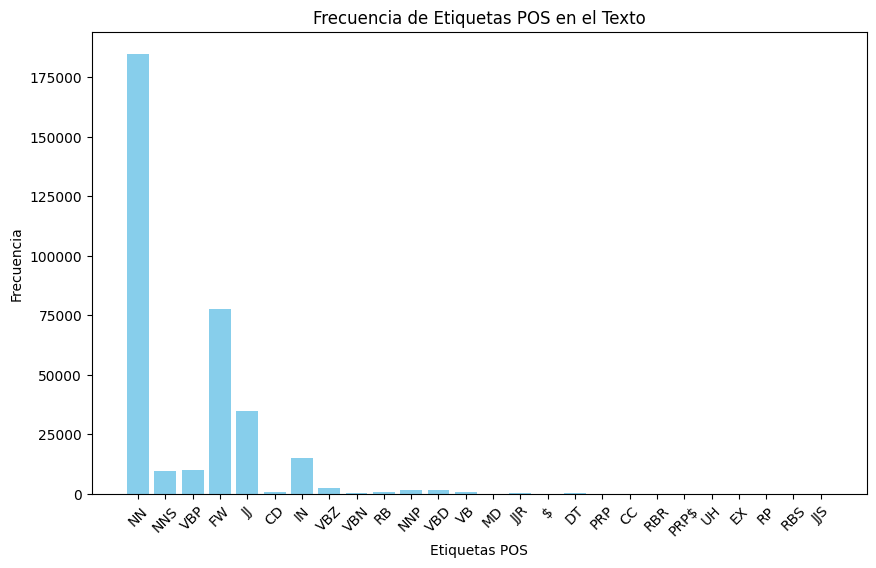

In [ ]:
# Contar las etiquetas POS
pos_tags_count = Counter(tag for word, tag in pos_tags)

# Crear gráfico de barras
tags, counts = zip(*pos_tags_count.items())

plt.figure(figsize=(10, 6))
plt.bar(tags, counts, color='skyblue')
plt.xlabel('Etiquetas POS')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Etiquetas POS en el Texto')
plt.xticks(rotation=45)
plt.show()

## 2.3 Distribución de Longitud de las Palabras

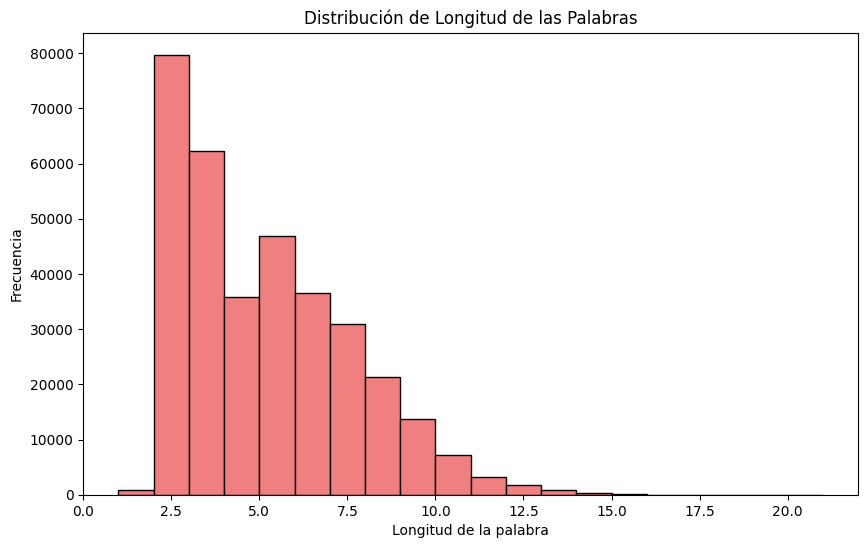

In [ ]:
# Calcular la longitud de cada palabra
word_lengths = [len(word) for word in filtered_tokens]

# Graficar la distribución de la longitud de las palabras
plt.figure(figsize=(10, 6))
plt.hist(word_lengths, bins=range(min(word_lengths), max(word_lengths) + 1, 1), color='lightcoral', edgecolor='black')
plt.xlabel('Longitud de la palabra')
plt.ylabel('Frecuencia')
plt.title('Distribución de Longitud de las Palabras')
plt.show()


## 2.4 Top 10: Palabras más comunes

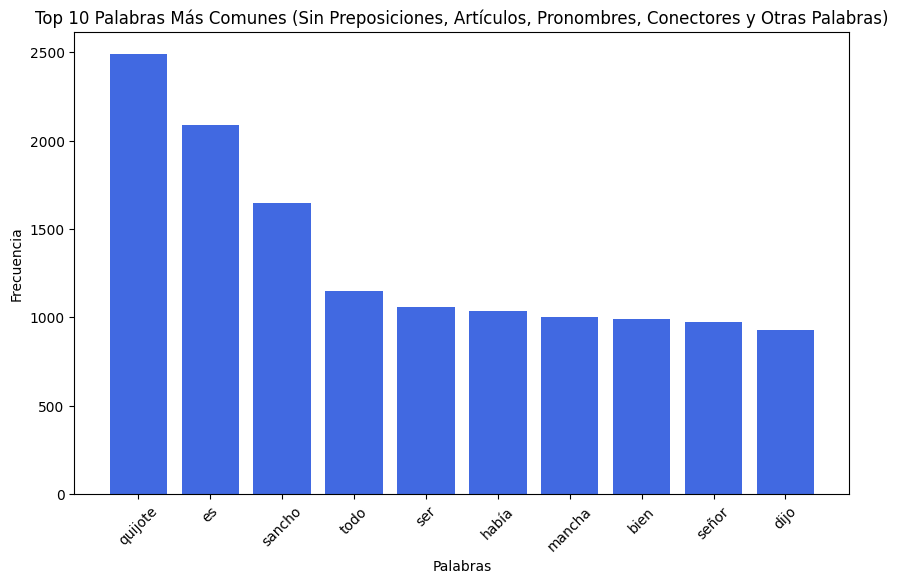

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Listas de palabras irrelevantes
preposiciones_es = {
    "a", "ante", "bajo", "cabe", "con", "contra", "de", "desde", "durante", "en",
    "entre", "hacia", "hasta", "mediante", "para", "por", "según", "sin", "so",
    "sobre", "tras", "versus", "vía"
}

articulos = {"el", "la", "los", "las", "un", "una", "unos", "unas"}

pronombres = {
    "yo", "tú", "vos", "usted", "él", "ella", "nosotros", "nosotras",
    "vosotros", "vosotras", "ustedes", "ellos", "ellas", "me", "te", "se",
    "nos", "os", "lo", "la", "le", "les", "los", "las", "mío", "mía", "míos",
    "mías", "tuyo", "tuya", "tuyos", "tuyas", "suyo", "suya", "suyos", "suyas",
    "nuestro", "nuestra", "nuestros", "nuestras", "vuestro", "vuestra",
    "vuestros", "vuestras", "cuyo", "cuya", "cuyos", "cuyas", "este", "esta",
    "estos", "estas", "ese", "esa", "esos", "esas", "aquel", "aquella",
    "aquellos", "aquellas", "quien", "quienes", "cual", "cuales", "que",
    "cuanto", "cuanta", "cuantos", "cuantas"
}

conectores = {
    "y", "e", "o", "u", "ni", "pero", "aunque", "sin embargo", "por lo tanto",
    "pues", "entonces", "además", "así", "asimismo", "también", "no obstante",
    "sino", "es decir", "en cambio", "mientras", "puesto que", "ya que",
    "debido a", "porque", "por qué", "con el fin de", "de modo que", "dado que",
    "de manera que", "luego", "por consiguiente", "al contrario", "en efecto",
    "por otro lado", "por una parte", "por otra parte"
}

# Otras palabras a excluir
palabras_excluir_adicionales = {
    "su", "del", "como", "mi", "más", "menos", "si", "al", "tan", "ha", "sus", "segun"
}

# Unir todas las palabras a excluir
palabras_excluir = preposiciones_es | articulos | pronombres | conectores | palabras_excluir_adicionales  # Unión de conjuntos

# Filtrar tokens eliminando preposiciones, artículos, pronombres, conectores y las nuevas palabras
filtered_tokens_clean = [word for word in filtered_tokens if word.lower() not in palabras_excluir]

# Contar las palabras más comunes
word_counts = Counter(filtered_tokens_clean)

# Obtener las 10 palabras más comunes
common_words = word_counts.most_common(10)

# Extraer las palabras y sus frecuencias
words, counts = zip(*common_words)

# Graficar las palabras más comunes
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='royalblue')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Top 10 Palabras Más Comunes (Sin Preposiciones, Artículos, Pronombres, Conectores y Otras Palabras)')
plt.xticks(rotation=45)
plt.show()


# 3. Análisis de Sentimiento

##3.1 VADER

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.4 MB/s eta 0:00:00
Sentimiento de polaridad (compound): -1.0
Sentimiento positivo: 0.012
Sentimiento negativo: 0.016
Sentimiento neutral: 0.972


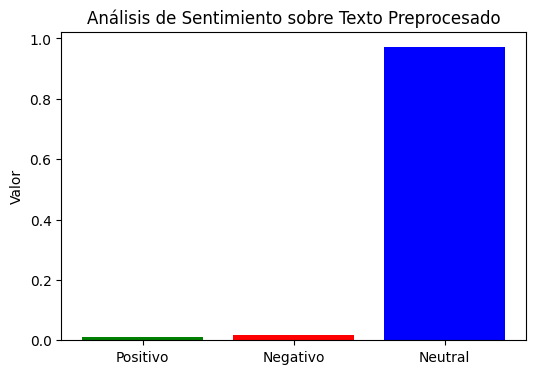

In [ ]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Unir las palabras lematizadas (o filtradas) en un solo texto
processed_text = ' '.join(lemmas)

# Crear el analizador de sentimientos de VADER
analyzer = SentimentIntensityAnalyzer()

# Obtener el sentimiento del texto
sentiment = analyzer.polarity_scores(processed_text)

# Mostrar los resultados de las métricas de polaridad
print("Sentimiento de polaridad (compound):", sentiment['compound'])
print("Sentimiento positivo:", sentiment['pos'])
print("Sentimiento negativo:", sentiment['neg'])
print("Sentimiento neutral:", sentiment['neu'])

# Graficar las métricas de sentimiento
sentiments = ['Positivo', 'Negativo', 'Neutral']
values = [sentiment['pos'], sentiment['neg'], sentiment['neu']]

plt.figure(figsize=(6, 4))
plt.bar(sentiments, values, color=['green', 'red', 'blue'])
plt.title('Análisis de Sentimiento sobre Texto Preprocesado')
plt.ylabel('Valor')
plt.show()

##3.2 BERT

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/650 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-uncased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/310 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/248k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/486k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/134 [00:00<?, ?B/s]

Device set to use cpu


Cantidad de tokens generados: 512
Fragmento 1: Sentimiento: Positivo, Confianza: 0.5065488815307617


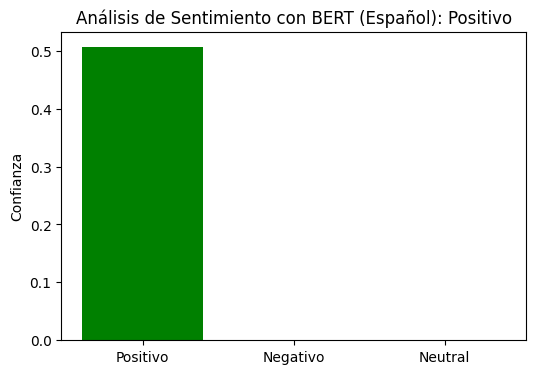

In [ ]:
from transformers import pipeline, AutoTokenizer
import matplotlib.pyplot as plt

# Crear el pipeline para el análisis de sentimiento usando un modelo BERT entrenado para español
sentiment_analyzer = pipeline("sentiment-analysis", model="dccuchile/bert-base-spanish-wwm-uncased")

# Cargar el tokenizador del modelo BERT en español
tokenizer = AutoTokenizer.from_pretrained("dccuchile/bert-base-spanish-wwm-uncased")

# Unir las palabras lematizadas (o filtradas) en un solo texto
processed_text = ' '.join(lemmas)

# Tokenizar el texto usando el tokenizador de BERT, con truncamiento y padding
tokens = tokenizer(processed_text, truncation=True, padding=True, max_length=512)

# Ver la cantidad de tokens generados
print(f"Cantidad de tokens generados: {len(tokens['input_ids'])}")

# Función para mapear el sentimiento de BERT a categorías de sentimiento
def map_to_sentiment(stars):
    if stars == "LABEL_0":
        return "Negativo"
    elif stars == "LABEL_1":
        return "Positivo"
    return "Neutral"

# Dividir el texto en fragmentos de 512 tokens o menos
max_tokens = 512
chunks = [tokens['input_ids'][i:i + max_tokens] for i in range(0, len(tokens['input_ids']), max_tokens)]  # Crear fragmentos

# Análisis de sentimiento para cada fragmento
sentiment_results = []
for chunk in chunks:
    # Reconstruir el texto del fragmento a partir de los tokens
    chunk_text = tokenizer.decode(chunk, skip_special_tokens=True)

    # Realizar el análisis de sentimiento
    result = sentiment_analyzer(chunk_text)

    sentiment_label = result[0]['label']
    confidence_score = result[0]['score']

    sentiment_category = map_to_sentiment(sentiment_label)
    sentiment_results.append((sentiment_category, confidence_score))

# Mostrar los resultados
for i, (sentiment_category, confidence_score) in enumerate(sentiment_results):
    print(f"Fragmento {i+1}: Sentimiento: {sentiment_category}, Confianza: {confidence_score}")

# Graficar el resultado con la puntuación de confianza para el primer fragmento
if sentiment_results:
    sentiment_category = sentiment_results[0][0]
    confidence_score = sentiment_results[0][1]

    # Asignar colores según el sentimiento
    color = 'green' if sentiment_category == 'Positivo' else 'red' if sentiment_category == 'Negativo' else 'gray'

    # Crear el gráfico de barras con la confianza para cada categoría de sentimiento
    sentiments = ['Positivo', 'Negativo', 'Neutral']
    values = [confidence_score if sentiment_category == 'Positivo' else 0,
              confidence_score if sentiment_category == 'Negativo' else 0,
              confidence_score if sentiment_category == 'Neutral' else 0]

    plt.figure(figsize=(6, 4))
    plt.bar(sentiments, values, color=[color, 'red', 'gray'])
    plt.title(f'Análisis de Sentimiento con BERT (Español): {sentiment_category}')
    plt.ylabel('Confianza')
    plt.show()


##Conclusiones del Análisis de Sentimiento: VADER vs BERT

Resultados:

- Modelo VADER arrojó un sentimiento global negativo (compuesto de -1.0), pero observamos que la mayoría de las palabras en el texto fueron clasificadas como neutrales (97.2%). Esto indica que el modelo interpretó que el contexto general del texto era negativo, aunque las palabras individuales no lo sugieren tanto. VADER tiende a ser más sensible a ciertos patrones en el texto, como las palabras clave que denotan negatividad o emociones fuertes.

- Modelo BERT en español, por otro lado, clasificó el sentimiento global del texto como positivo con una confianza moderada de 50.65%. Aunque esta confianza no es alta, el modelo parece haber entendido el contexto global del texto, sugiriendo que en su totalidad el mensaje tiene una carga positiva, probablemente por cómo las palabras se conectan entre sí.

Interpretación y Contexto:

- VADER tiende a trabajar mejor con textos cortos y directos, pero su rendimiento puede verse afectado por la falta de contexto y las interpretaciones superficiales de las palabras individuales. Si hay una mezcla de palabras neutrales y negativas con poco contexto, puede arrojar una polaridad negativa (como en este caso), incluso si el texto en general no tiene un tono abiertamente negativo.

- BERT en español, ha sido entrenado específicamente en textos en español y al ser un modelo basado en contexto, probablemente fue capaz de detectar más matices y relaciones dentro del texto. BERT puede manejar mejor las ambigüedades y las sutilezas que un modelo más sencillo como VADER no puede capturar, y por eso su predicción fue positiva. Sin embargo, la confianza de 50.65% indica que el modelo no está completamente seguro, lo que es normal en textos más complejos o largos.

Conclusión:

El hecho de usar el modelo BERT en español y que el texto esté también en español es, sin duda, una gran ventaja. Este modelo es mucho más capaz de entender las sutilezas y el contexto del idioma, lo que mejora la precisión en la clasificación de sentimientos, especialmente cuando se trata de textos complejos o con sentimientos matizados.

Aunque VADER es útil para análisis rápidos y sencillos, BERT es más adecuado cuando se busca un análisis de sentimiento profundo y contextual en textos en español. En resumen, BERT es la opción superior para obtener un análisis más preciso y contextualizado en este caso.